In [0]:
# import lib
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import statsmodels.api as sm
import seaborn as sns


from pandas import DataFrame
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

#FarhanRamdhani
#H071171527
#IlmuKomputer-UH
%matplotlib inline

In [0]:
# Read data from csv
data = pd.read_csv('co2.csv')

# preview co2 head
data.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [0]:
# summarize
data.describe()
#df.describe(include = 'all')

,MODEL_YEAR,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,FUEL_CONSUMPTION_COMB_MPG,CO2_EMISSIONS
count,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000
mean,2007.623022,3.474308,5.989054,12.914279,8.815708,11.071512,27.353483,248.530782
std,4.140223,1.310875,1.776277,3.549669,2.344114,2.976739,7.503766,59.144102
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2004.000000,2.400000,4.000000,10.600000,7.200000,9.100000,22.000000,209.000000
50%,2008.000000,3.400000,6.000000,12.400000,8.300000,10.500000,27.000000,239.000000
75%,2011.000000,4.300000,8.000000,14.900000,10.200000,12.800000,31.000000,285.000000
max,2014.000000,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


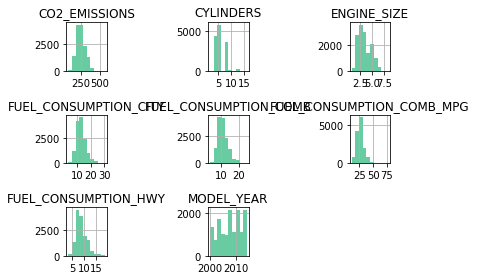

In [0]:
data.hist(color = '#69cba1')
plt.tight_layout()
plt.show()


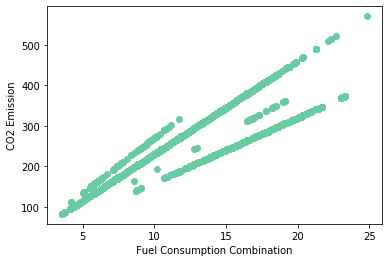

In [0]:
plt.scatter(data.FUEL_CONSUMPTION_COMB, data.CO2_EMISSIONS,  color='#69cba1')
plt.xlabel("Fuel Consumption Combination")
plt.ylabel("CO2 Emission")
plt.show()

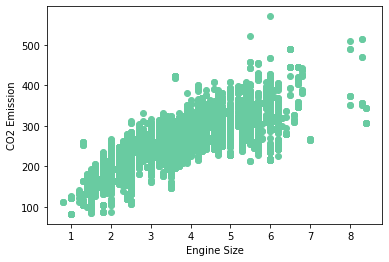

In [0]:
plt.scatter(data.ENGINE_SIZE, data.CO2_EMISSIONS,  color='#69cba1')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

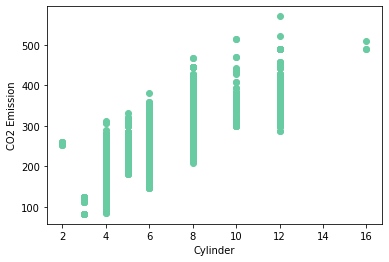

In [0]:
plt.scatter(data.CYLINDERS, data.CO2_EMISSIONS,  color='#69cba1')
plt.xlabel("Cylinder")
plt.ylabel("CO2 Emission")
plt.show()

In [0]:
#make dataframe with multiple regg attributes
dataToReg = data[['ENGINE_SIZE','CYLINDERS','FUEL_CONSUMPTION_COMB','CO2_EMISSIONS']]
dataToReg.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_COMB,CO2_EMISSIONS
0,1.6,4,8.1,186
1,1.6,4,7.6,175
2,3.2,6,10.0,230
3,3.5,6,11.5,264
4,1.8,4,8.6,198


In [0]:
# split data 70% train, 30% test
train, test = train_test_split(dataToReg, test_size=0.3)
print("before split: ",dataToReg.shape,", training data size: ",train.shape, "[70%], testing data size: ",test.shape,"[30%]")

before split:  (14343, 4) , training data size:  (10040, 4) [70%], testing data size:  (4303, 4) [30%]


In [0]:
#training x and y from training data
xTraining = train[['ENGINE_SIZE','CYLINDERS', 'FUEL_CONSUMPTION_COMB']]
yTraining = train['CO2_EMISSIONS']

#testing x and y from testing data
xTesting = test[['ENGINE_SIZE','CYLINDERS', 'FUEL_CONSUMPTION_COMB']]
yTesting = test['CO2_EMISSIONS']

In [0]:
#multiple regression model
multireg = linear_model.LinearRegression()
multireg.fit(xTraining, yTraining) #fit(enginesize, cylinders, fuelconsumption)

print(multireg) #mutlireg model
print('Intercept: \n', multireg.intercept_) #multireg intercept
print('Coefficients: \n', multireg.coef_) #multireg coefficient
print('Variance score: {}'.format(multireg.score(xTesting, yTesting)))  #multireg variance (1 means perfect)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Intercept: 
 43.1020146866945
Coefficients: 
 [ 5.18800175  5.16507155 14.14927589]
Variance score: 0.8551895387297931


In [0]:
#create y from x testing with multireg prediction
yPredicted = pd.DataFrame(multireg.predict(xTesting), columns=['CO2_EMISSIONS'])
yPredicted.head()

,CO2_EMISSIONS
0,281.945128
1,249.401794
2,235.016664
3,252.373122
4,278.503125


In [0]:
yTesting = pd.DataFrame(yTesting)
yTesting.head()

,CO2_EMISSIONS
7101,219
6693,262
2589,235
3882,264
10775,269


In [0]:
#plot color
cTrain = '#665178'
cTest = '#A9CDC3'

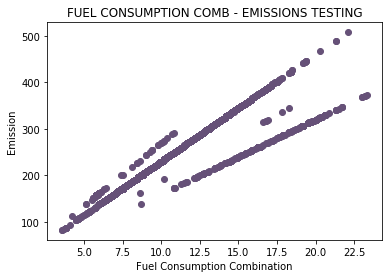

In [0]:
plt.scatter(xTesting.FUEL_CONSUMPTION_COMB, yTesting.CO2_EMISSIONS,  color=cTrain)
plt.title("FUEL CONSUMPTION COMB - EMISSIONS TESTING")
plt.xlabel("Fuel Consumption Combination")
plt.ylabel("Emission")
plt.show()

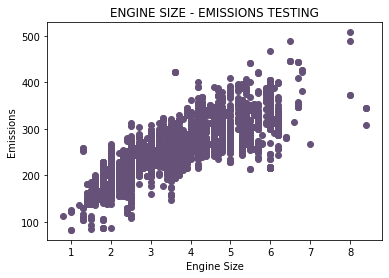

In [0]:
plt.scatter(xTesting.ENGINE_SIZE, yTesting.CO2_EMISSIONS,  color=cTrain)
plt.title("ENGINE SIZE - EMISSIONS TESTING")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

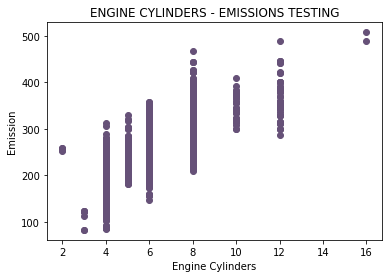

In [0]:
plt.scatter(xTesting.CYLINDERS, yTesting.CO2_EMISSIONS,  color=cTrain)
plt.title("ENGINE CYLINDERS - EMISSIONS TESTING")
plt.xlabel("Engine Cylinders")
plt.ylabel("Emission")
plt.show()

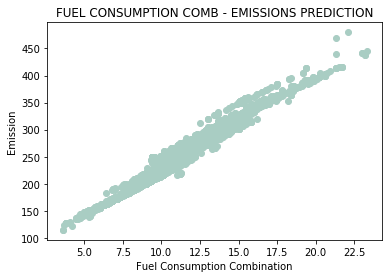

In [0]:
plt.scatter(xTesting.FUEL_CONSUMPTION_COMB, yPredicted.CO2_EMISSIONS,  color=cTest)
plt.title("FUEL CONSUMPTION COMB - EMISSIONS PREDICTION")
plt.xlabel("Fuel Consumption Combination")
plt.ylabel("Emission")
plt.show()

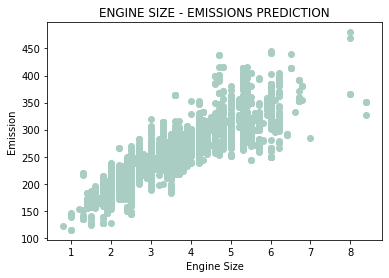

In [0]:
plt.scatter(xTesting.ENGINE_SIZE, yPredicted.CO2_EMISSIONS,  color=cTest)
plt.title("ENGINE SIZE - EMISSIONS PREDICTION")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

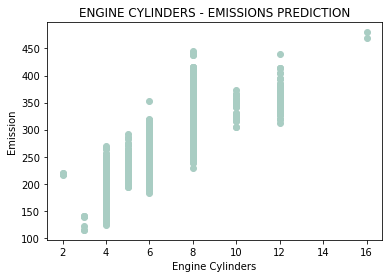

In [0]:
plt.scatter(xTesting.CYLINDERS, yPredicted.CO2_EMISSIONS,  color=cTest)
plt.title("ENGINE CYLINDERS - EMISSIONS PREDICTION")
plt.xlabel("Engine Cylinders")
plt.ylabel("Emission")
plt.show()

In [0]:
comparableData = pd.DataFrame({'Actual_CO2EMISSIONS': yTesting.values.flatten(), 'Predicted_CO2EMISSIONS': yPredicted.values.flatten()})
comparableData.describe()

,Actual_CO2EMISSIONS,Predicted_CO2EMISSIONS
count,4303.000000,4303.000000
mean,247.457123,248.069516
std,58.072899,54.803818
min,83.000000,114.722624
25%,209.000000,207.801771
50%,238.000000,238.223846
75%,283.000000,281.639054
max,508.000000,479.946171


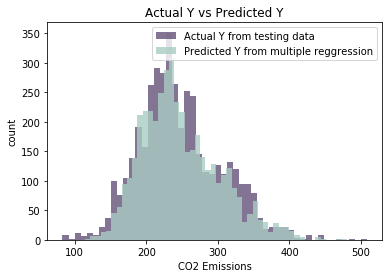

In [0]:
plt.hist(comparableData.Actual_CO2EMISSIONS, bins = 50, alpha=0.8, label='Actual Y from testing data', color = cTrain)
plt.hist(comparableData.Predicted_CO2EMISSIONS, bins = 50, alpha=0.8, label='Predicted Y from multiple reggression', color = cTest)
plt.legend(loc='upper right')
plt.title("Actual Y vs Predicted Y")
plt.xlabel("CO2 Emissions")
plt.ylabel("count")
plt.show()


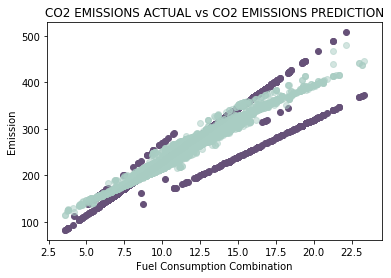

In [0]:
plt.scatter(xTesting.FUEL_CONSUMPTION_COMB, comparableData.Actual_CO2EMISSIONS, color=cTrain)
plt.scatter(xTesting.FUEL_CONSUMPTION_COMB, comparableData.Predicted_CO2EMISSIONS, color=cTest, alpha = 0.5)
plt.title("CO2 EMISSIONS ACTUAL vs CO2 EMISSIONS PREDICTION")
plt.xlabel("Fuel Consumption Combination")
plt.ylabel("Emission")
plt.show()

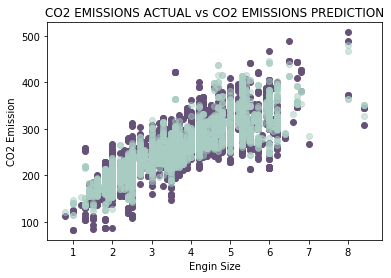

In [0]:
plt.scatter(xTesting.ENGINE_SIZE, comparableData.Actual_CO2EMISSIONS, color=cTrain)
plt.scatter(xTesting.ENGINE_SIZE, comparableData.Predicted_CO2EMISSIONS, color=cTest, alpha = 0.5)
plt.title("CO2 EMISSIONS ACTUAL vs CO2 EMISSIONS PREDICTION")
plt.xlabel("Engin Size")
plt.ylabel("CO2 Emission")
plt.show()

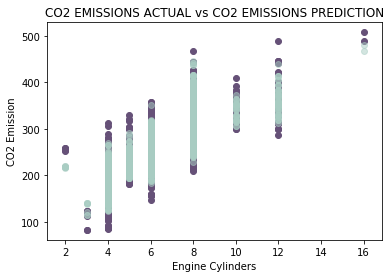

In [0]:
plt.scatter(xTesting.CYLINDERS, comparableData.Actual_CO2EMISSIONS, color=cTrain)
plt.scatter(xTesting.CYLINDERS, comparableData.Predicted_CO2EMISSIONS, color=cTest, alpha = 0.5)
plt.title("CO2 EMISSIONS ACTUAL vs CO2 EMISSIONS PREDICTION")
plt.xlabel("Engine Cylinders")
plt.ylabel("CO2 Emission")
plt.show()

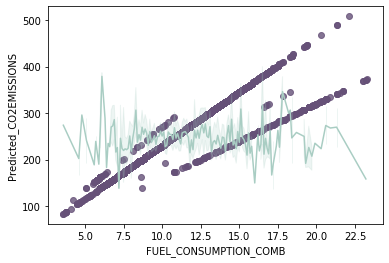

In [0]:
sns.regplot(xTesting.FUEL_CONSUMPTION_COMB, comparableData.Actual_CO2EMISSIONS, fit_reg=False, color = cTrain)
sns.lineplot(xTesting.FUEL_CONSUMPTION_COMB, comparableData.Predicted_CO2EMISSIONS, color = cTest)

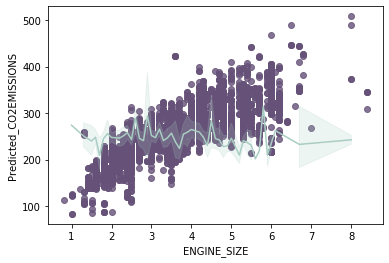

In [0]:
sns.regplot(xTesting.ENGINE_SIZE, comparableData.Actual_CO2EMISSIONS, fit_reg=False, color = cTrain)
sns.lineplot(xTesting.ENGINE_SIZE, comparableData.Predicted_CO2EMISSIONS, color = cTest)

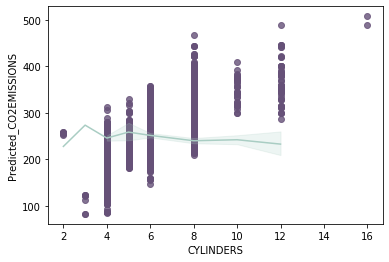

In [0]:
sns.regplot(xTesting.CYLINDERS, comparableData.Actual_CO2EMISSIONS, fit_reg=False, color = cTrain)
sns.lineplot(xTesting.CYLINDERS, comparableData.Predicted_CO2EMISSIONS, color = cTest)

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(comparableData.Actual_CO2EMISSIONS, comparableData.Predicted_CO2EMISSIONS))
print('Mean Squared Error:', metrics.mean_squared_error(comparableData.Actual_CO2EMISSIONS, comparableData.Predicted_CO2EMISSIONS))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(comparableData.Actual_CO2EMISSIONS, comparableData.Predicted_CO2EMISSIONS)))

Mean Absolute Error: 14.033897683979582
Mean Squared Error: 488.25422641697577
Root Mean Squared Error: 22.096475429737108
